Found 13438 images belonging to 21 classes.
Found 3348 images belonging to 21 classes.


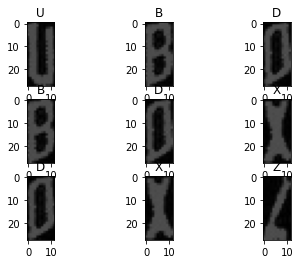

In [1]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

class_names = ['A', 'B', 
               'C', 'D', 'E', 'F', 
               'G', 'H', 'K', 'L', 
               'M', 'N', 'P', 
               'R', 'S', 'T', 'U', 
               'V', 'X', 'Y', 'Z']

def rgb_to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

datagen = ImageDataGenerator(
    preprocessing_function=rgb_to_grayscale,
    rescale=1.0/255, 
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_generator = datagen.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=1024,
    subset='training',
    class_mode='sparse'
)

validation_generator = datagen.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=1024,
    subset='validation',
    class_mode='sparse'
)

fig, axs = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (10,8)

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(validation_generator[0][0][i + j])
        axs[i, j].set_title(class_names[int(validation_generator[0][1][i + j])])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28,12,3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu', 
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(512, (1,1), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (1,1), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (1,1), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') > 0.99 and logs.get('accuracy') > 0.99) :
            print('\nReached 99% accuracy so stopping training')
            self.model.stop_training = True

In [ ]:
callback = stopCallback()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel\\version3.hdf5',
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True)

history = model.fit(train_generator, 
                    epochs=1000, 
                    callbacks=[callback, model_checkpoint_callback], 
                    validation_data=validation_generator)

In [ ]:
H = {}
H['number'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='sparse_categorical_crossentropy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 3)